In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



In [2]:
# Read the CSV files
train = pd.read_csv(r"C:\Users\namra\Downloads\titanic\train.csv")
test = pd.read_csv(r"C:\Users\namra\Downloads\titanic\test.csv")

# Drop unnecessary columns
train.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)
test.drop(["Cabin", "Name", "PassengerId", "Ticket"], axis=1, inplace=True)

# Map categorical variables to numerical values
train['Sex'] = train['Sex'].map({'male': 0, 'female': 1})
train['Embarked'] = train['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

# Handle missing values and bin numerical variables
train['Age'] = train['Age'].fillna(method='backfill')
train['Embarked'] = train['Embarked'].fillna(method='ffill')

train = train[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp', 'Survived']]
test = test[['Age', 'Embarked', 'Fare', 'Parch', 'Pclass', 'Sex', 'SibSp']]





<AxesSubplot:xlabel='SibSp', ylabel='Count'>

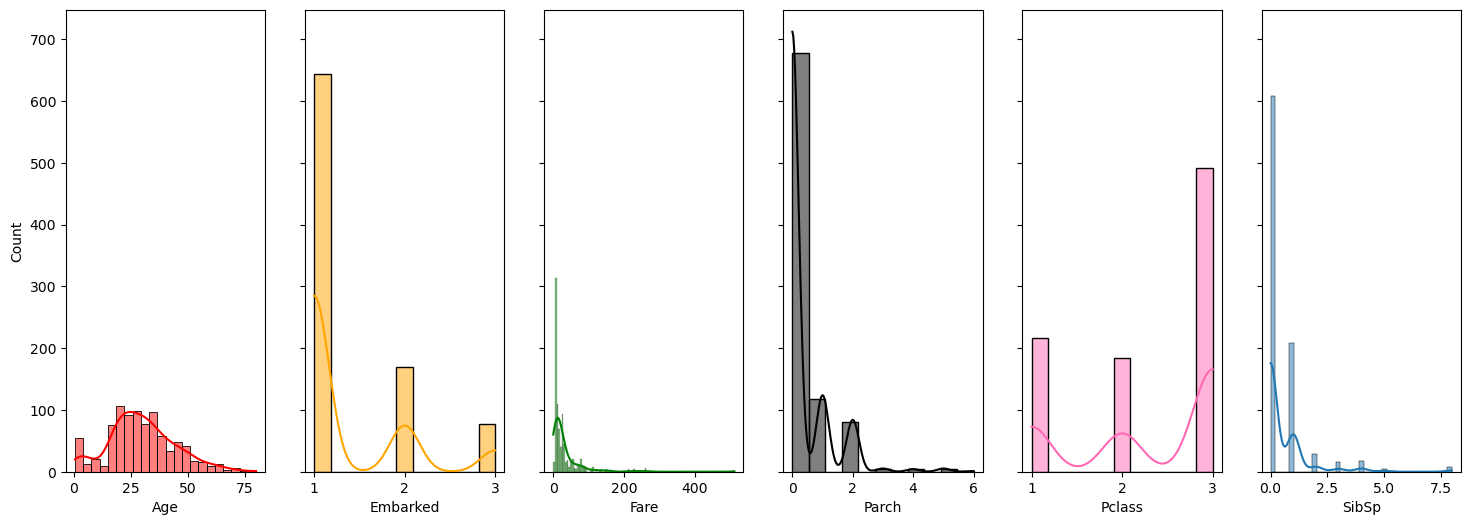

In [3]:
fig, axes = plt.subplots(1,6, figsize=(18,6),sharey=True)
sns.histplot(train, ax = axes[0], x = 'Age',color='r',kde=True)
sns.histplot(train, ax = axes[1], x = 'Embarked',color='orange',kde=True)
sns.histplot(train, ax = axes[2], x = 'Fare',color='green',kde=True)
sns.histplot(train, ax = axes[3], x = 'Parch',color='black',kde=True)
sns.histplot(train, ax = axes[4], x = 'Pclass',color='hotpink',kde=True)
sns.histplot(train, ax = axes[5], x = 'SibSp',kde=True)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

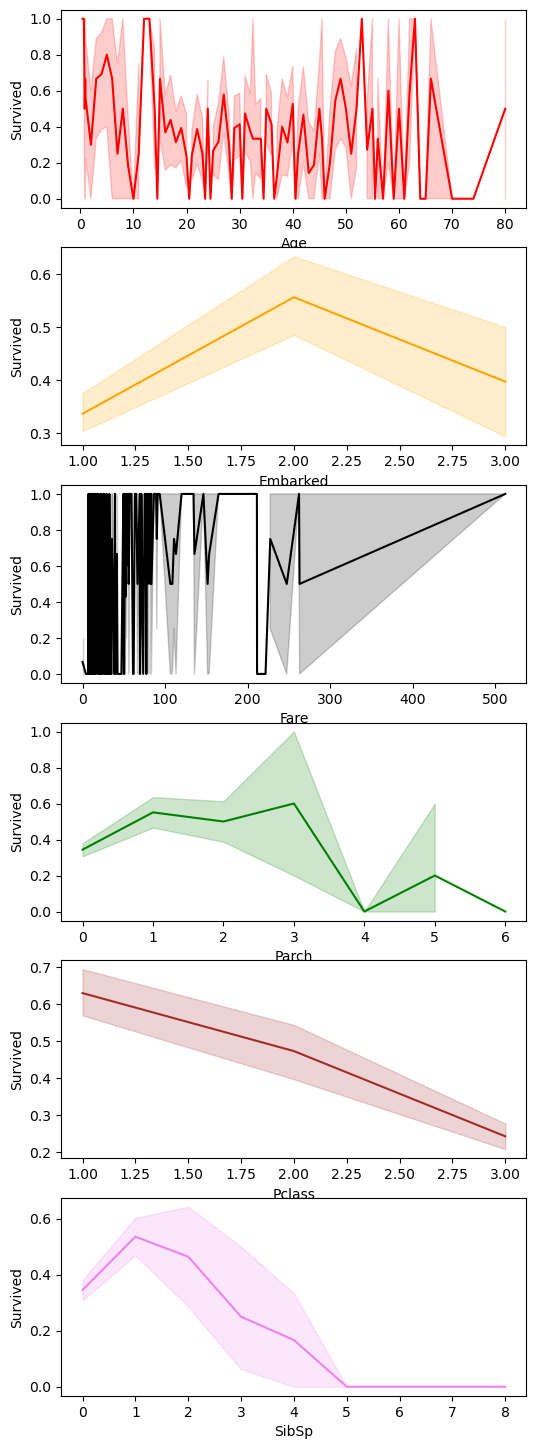

In [5]:
fig, axes = plt.subplots(6,1, figsize=(6,18))
sns.lineplot(ax = axes[0],data = train,y = 'Survived',x = 'Age' ,color='r')
sns.lineplot(ax = axes[1],data = train,y = 'Survived',x = 'Embarked' ,color='orange')
sns.lineplot(ax = axes[2],data = train,y = 'Survived',x = 'Fare' ,color='black')
sns.lineplot(ax = axes[3],data = train,y = 'Survived',x = 'Parch' ,color='green')
sns.lineplot(ax = axes[4],data = train,y = 'Survived',x = 'Pclass' ,color='brown')
sns.lineplot(ax = axes[5],data = train,y = 'Survived',x = 'SibSp' ,color='violet')

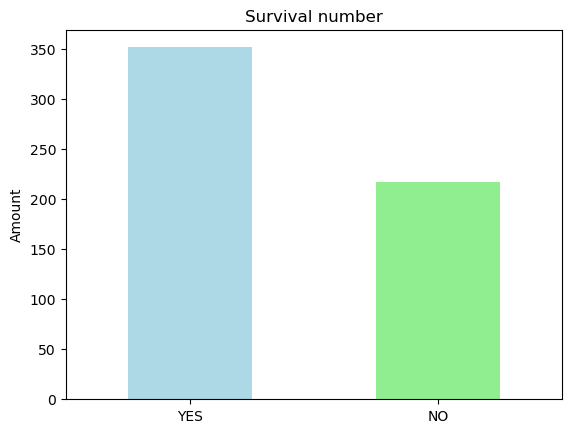

In [15]:
#plotting bar chart.
fig = train.Survived.value_counts().plot(kind = 'bar', color=["lightblue", 'lightgreen']) 
fig.set_xticklabels(labels=['YES', "NO"], rotation=0)
plt.title("Survival number") 
plt.ylabel("Amount"); 

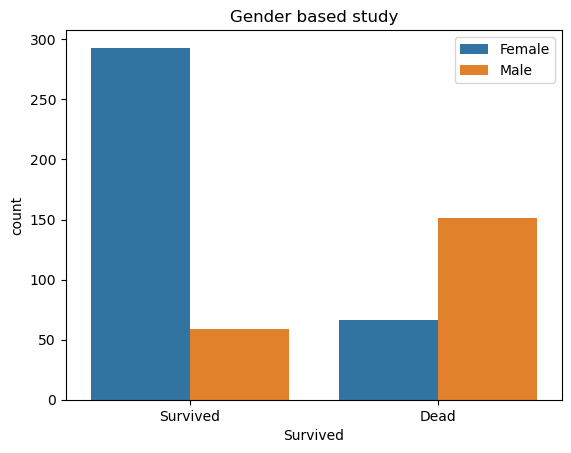

In [17]:
fig = sns.countplot(x = 'Survived', data = train, hue = 'Sex')    
fig.set_xticklabels(labels=["Survived", 'Dead'], rotation=0) #x axis labelling 
plt.legend(['Female', 'Male'])  #naming legend
plt.title("Gender based study"); # title giving

In [7]:
# Bin the 'Age' variable
data = [train, test]
for d in data:
    d['Age'] = d['Age'].fillna(-1).astype(int)
    d.loc[d['Age'] <= 10, 'Age'] = 0
    d.loc[(d['Age'] > 10) & (d['Age'] <= 18), 'Age'] = 1
    d.loc[(d['Age'] > 18) & (d['Age'] <= 25), 'Age'] = 2
    d.loc[(d['Age'] > 25) & (d['Age'] <= 30), 'Age'] = 3
    d.loc[(d['Age'] > 30) & (d['Age'] <= 35), 'Age'] = 4
    d.loc[(d['Age'] > 35) & (d['Age'] <= 40), 'Age'] = 5
    d.loc[(d['Age'] > 40) & (d['Age'] <= 65), 'Age'] = 6
    d.loc[d['Age'] > 65, 'Age'] = 6

# Bin the 'Fare' variable
data = [train, test]
for d in data:
    d.loc[d['Fare'] <= 8, 'Fare'] = 0
    d.loc[(d['Fare'] > 8) & (d['Fare'] <= 15), 'Fare'] = 1
    d.loc[(d['Fare'] > 15) & (d['Fare'] <= 31), 'Fare'] = 2
    d.loc[(d['Fare'] > 31) & (d['Fare'] <= 99), 'Fare'] = 3
    d.loc[(d['Fare'] > 99) & (d['Fare'] <= 250), 'Fare'] = 4
    d.loc[d['Fare'] > 250, 'Fare'] = 5
    d['Fare'] = d['Fare'].fillna(-1).astype(int)



<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

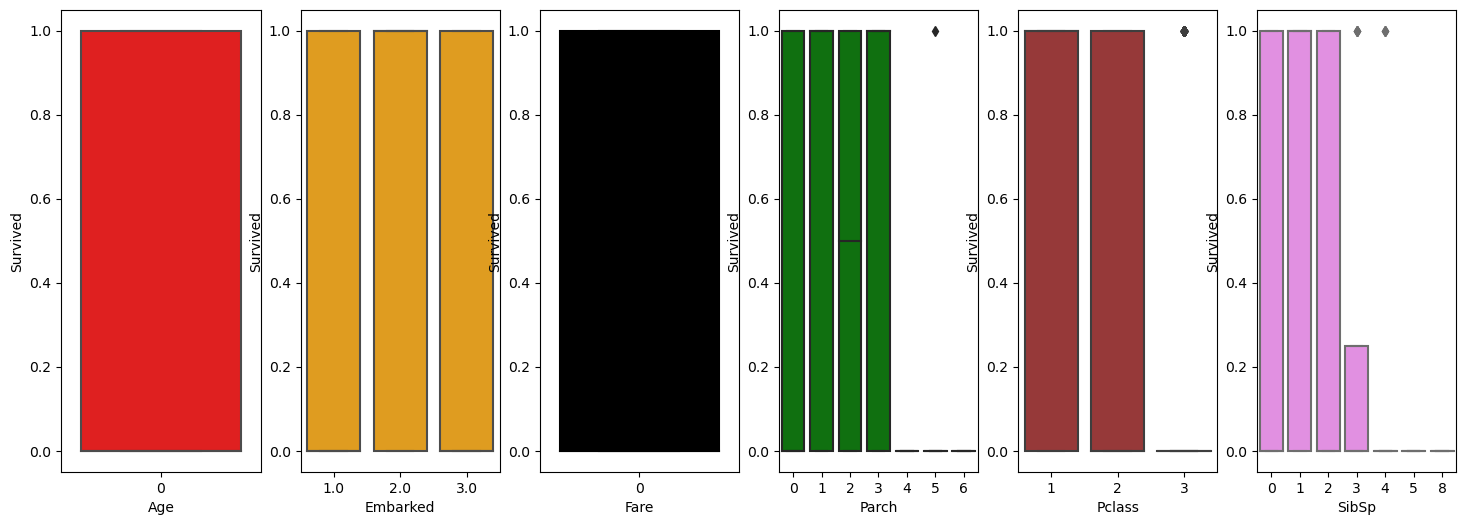

In [8]:
fig, axes = plt.subplots(1,6, figsize=(18,6))
sns.boxplot(ax = axes[0],data = train,y = 'Survived',x = 'Age' ,color='r')
sns.boxplot(ax = axes[1],data = train,y = 'Survived',x = 'Embarked' ,color='orange')
sns.boxplot(ax = axes[2],data = train,y = 'Survived',x = 'Fare' ,color='black')
sns.boxplot(ax = axes[3],data = train,y = 'Survived',x = 'Parch' ,color='green')
sns.boxplot(ax = axes[4],data = train,y = 'Survived',x = 'Pclass' ,color='brown')
sns.boxplot(ax = axes[5],data = train,y = 'Survived',x = 'SibSp' ,color='violet')

In [9]:
# Convert 'Survived' column to integer type
train.Survived = train.Survived.astype(int)

# Split the data into training and test sets
train, test = train_test_split(train, test_size=0.2)

# Calculate prior probabilities of survival and non-survival
survived_yes = train.loc[train.Survived == 1]
P_yes = len(survived_yes) / len(train)

survived_no = train.loc[train.Survived == 0]
P_no = len(survived_no) / len(train)

# Create a DataFrame to store actual and predicted values
output_dataframe = pd.DataFrame(columns=['Actual', 'Predicted'])




In [10]:
# Iterate over each row in the test set
# Iterate over each row in the test set
for row in test.itertuples(index=False):
    test1 = list(row[:-1])  # Exclude the last element (actual value)
    ans = row[-1]  # Last element is the actual value

    py = 1
    for j in range(len(test1)):
        val = train[(train[train.columns[j]] == test1[j]) & (train.Survived == 1)].shape[0]
        py *= val / len(survived_yes)
    total_yes = py * P_yes

    pn = 1
    for j in range(len(test1)):
        val = train[(train[train.columns[j]] == test1[j]) & (train.Survived == 0)].shape[0]
        pn *= val / len(survived_no)
    total_no = pn * P_no

    # Compare probabilities and assign predicted value
    if total_yes > total_no:
        list1 = [[ans, 1]]
        output_dataframe = output_dataframe.append(pd.DataFrame(list1, columns=['Actual', 'Predicted']), ignore_index=True)
    else:
        list0 = [[ans, 0]]
        output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)



C:\Users\namra\AppData\Local\Temp\ipykernel_17748\636260026.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)
C:\Users\namra\AppData\Local\Temp\ipykernel_17748\636260026.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)
C:\Users\namra\AppData\Local\Temp\ipykernel_17748\636260026.py:25: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)
C:\Users\namra\AppData\Local\Temp\ipykernel_17

In [11]:
# Calculate true positives, true negatives, false positives, and false negatives
TP = output_dataframe[(output_dataframe['Predicted'] == 1) & (output_dataframe['Actual'] == 1)].shape[0]
TN = output_dataframe[(output_dataframe['Predicted'] == 0) & (output_dataframe['Actual'] == 0)].shape[0]
FP = output_dataframe[(output_dataframe['Predicted'] == 1) & (output_dataframe['Actual'] == 0)].shape[0]
FN = output_dataframe[(output_dataframe['Predicted'] == 0) & (output_dataframe['Actual'] == 1)].shape[0]

# Calculate accuracy, precision, and recall
accuracy = (TP + TN) / len(output_dataframe)
print("The accuracy for the test set is", accuracy * 100, "%")

precision = TP / (TP + FP)
print("The precision for the test set is", precision * 100, "%")

recall = TP / (TP + FN)
print("The recall for the test set is", recall * 100, "%")

The accuracy for the test set is 80.44692737430168 %
The precision for the test set is 80.0 %
The recall for the test set is 67.6056338028169 %


In [12]:
#knn

# Split the data into training and test sets
train, test = train_test_split(train, test_size=0.2)

# Calculate prior probabilities of survival and non-survival
survived_yes = train.loc[train.Survived == 1]
P_yes = len(survived_yes) / len(train)

survived_no = train.loc[train.Survived == 0]
P_no = len(survived_no) / len(train)



In [13]:
# Create a DataFrame to store actual and predicted values
output_dataframe = pd.DataFrame(columns=['Actual', 'Predicted'])

# Iterate over each row in the test set
for row in test.itertuples(index=False):
    test1 = list(row[:-1])  # Exclude the last element (actual value)
    ans = row[-1]  # Last element is the actual value

    distances = []
    for train_row in train.itertuples(index=False):
        train1 = list(train_row[:-1])
        distance = np.sqrt(np.sum(np.square(np.subtract(train1, test1))))
        distances.append((train1, distance))

    # Sort distances in ascending order
    distances.sort(key=lambda x: x[1])

    k = 5  # Set the value of K (number of neighbors)
    neighbors = [item[0] for item in distances[:k]]

    total_yes = sum(1 for neighbor in neighbors if neighbor[-1] == 1)
    total_no = sum(1 for neighbor in neighbors if neighbor[-1] == 0)

    # Compare counts and assign predicted value
    if total_yes > total_no:
        list1 = [[ans, 1]]
        output_dataframe = output_dataframe.append(pd.DataFrame(list1, columns=['Actual', 'Predicted']), ignore_index=True)
    else:
        list0 = [[ans, 0]]
        output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)



C:\Users\namra\AppData\Local\Temp\ipykernel_17748\2969529762.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)
C:\Users\namra\AppData\Local\Temp\ipykernel_17748\2969529762.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)
C:\Users\namra\AppData\Local\Temp\ipykernel_17748\2969529762.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  output_dataframe = output_dataframe.append(pd.DataFrame(list0, columns=['Actual', 'Predicted']), ignore_index=True)
C:\Users\namra\AppData\Local\Temp\ipykernel

In [14]:
# Calculate true positives, true negatives, false positives, and false negatives
TP = output_dataframe[(output_dataframe['Predicted'] == 1) & (output_dataframe['Actual'] == 1)].shape[0]
TN = output_dataframe[(output_dataframe['Predicted'] == 0) & (output_dataframe['Actual'] == 0)].shape[0]
FP = output_dataframe[(output_dataframe['Predicted'] == 1) & (output_dataframe['Actual'] == 0)].shape[0]
FN = output_dataframe[(output_dataframe['Predicted'] == 0) & (output_dataframe['Actual'] == 1)].shape[0]

# Calculate accuracy, precision, and recall
accuracy = (TP + TN) / len(output_dataframe)
print("The accuracy for the test set is", accuracy * 100, "%")

precision = TP / (TP + FP)
print("The precision for the test set is", precision * 100, "%")

recall = TP / (TP + FN)
print("The recall for the test set is", recall * 100, "%")

The accuracy for the test set is 63.63636363636363 %
The precision for the test set is 52.38095238095239 %
The recall for the test set is 40.74074074074074 %
